# **1st Group Assignment: Predicting Forest Cover Type**
Group 16

# Part 1. Business Understanding and Problem Statement

The problem we wish to address relates to monitoring forest health. One-third of the Earth's landmass is covered by forests (Why Do Forests Matter?, n.d.). Their survival is crucial as forests mitigate the effects of climate change by absorbing carbon dioxide, provide environmental stability, prevent erosion, and serve as a water source to nearly half of the world’s largest cities (Why Do Forests Matter?, n.d; Forests and Forestry, 2024; Importance of Forests, n.d.). The main causes of forest health deterioration are linked to climate change, insect and disease infestations, and forest fragmentation and conversion (Potter, 2018). Moreover, one third of forests in the EU are still in decline, affecting the biodiversity in those areas (Maes et al., 2023). Knowing the tree composition of forests can help with these issues. By developing a classification model that can accurately distinguish different tree species, the tree composition of forests can be assessed to help with forest management, biodiversity conservation, and monitoring forest health.

Random Forest and SVM were chosen as these models are widely used for tree clasiffication tasks (Fassnacht et al., 2016). In particular, RF models tend to be popular due to their tendency of being highly accurate and low data preprocessing requirements. These models will be implemented on a dataset containing data collected from the Roosevelt National Forest of northern Colorado.

### Key objectives
This research aims to address the following key objectives:
1. Tree cover type classification: Developing a classification model that can accurately identify the tree cover type using random forests (RF) and support vector machines (SVM). This will help us understand an area's biodiversity.
2. Wildfire risk assessment: Using the results from the tree cover type classification, the fire risk associated with an area can be examined as certain tree cover types are more prone to wildfires.
3. Resource allocation optimization: By understanding which areas contain certain tree cover types, the resource allocation for these areas can be optimized to ensure their growth.



### Benefits of solving the problem using data mining
There are several benefits to using data mining techniques for this research. For this purpose, the CRISP-DM framework for data mining processes will be followed, to bring structure and efficiency to the research. First, the Business Understanding and Data Understanding parts ensure that the research objectives align with the stakeholders’ needs, i.e. the forest management team. In this case, the usage of our model could allow the forest management team to take preventive measures as well as gain more insight into the biodiversity of forest areas. This way, they can better preserve the biodiversity of these areas, identify high-risk wildfire zones, and allocate their resources more optimally using the results of the tree cover type classification. The research is therefore conducted as follows. In the Data Preparation step, the dataset was cleaned and prepared for the analyses. During the Modeling and Evaluation steps, the SVM and Random Forest models were implemented and evaluated, to provide accurate results. In the Deployment step, stakeholders can integrate the machine learning models into their decision-making processes. In conclusion, data mining allows for automation of large amounts of data that would otherwise require labor-intensive field studies, as well as provides data-driven results.  

### Pipeline/Architecture of our Approach
The initial pipeline and architecture of our approach is based on the CRISP-DM process. As this project's business understanding has been established, the next step in creating our models is familiarizing ourselves with the data. In this stage, we ensure that all our business requirements can be met and answered by the data that we are using. If this is the case, we move on to the data preparation phase where the data is cleaned accordingly to the needs of our two conceptual models. At this stage, variables will be combined, and a new variable will be created (`cover_type`). An extensive exploratory data analysis will also be performed on the variables to detect their common characteristics and spot potential patterns and anomalies. Once completed, predictors will be standarsized using scikit-learn's `StandardScalar()` to improve the performance of our SVM models. Afterwards, we move on to our modelling phase. Two different types of classification models will be built: random forest models and SVM. Due to imbalances in our dependent variable different models will be run on three different datasets: inbalanced, oversample, and undersample to compare results.If necessary, the models will be revised and fine tuned to ensure better results. In the end, the best model from each classification algorithm will be evaluated and compared on several measures from the confusion matrix. Lastly, if the models meet all of our business requirements they will be deployed to our customers (refer to our .py file).



# Part 2. Data Preparation and Exploratory Data Analysis (EDA)

In [ ]:
#importing the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
import urllib.request
from sklearn.preprocessing import LabelEncoder

## for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# retrieving the data
urllib.request.urlretrieve("https://www.openml.org/data/download/3615/dataset_184_covertype.arff", "f.arff")
arff_file = arff.loadarff('/content/f.arff')
df_raw=pd.DataFrame(arff_file[0]) # transforming arff file into pandas dataframe
forest_df = df_raw.copy() # saving copy

In [ ]:
# looking at the first five observations
forest_df.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,2754.0,146.0,5.0,150.0,2.0,1790.0,227.0,239.0,146.0,700.0,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'Lodgepole_Pine'
1,3219.0,21.0,8.0,67.0,-1.0,2869.0,215.0,223.0,145.0,1825.0,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'Spruce_Fir'
2,2965.0,337.0,16.0,42.0,7.0,4288.0,184.0,217.0,171.0,324.0,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'Spruce_Fir'
3,2368.0,14.0,15.0,150.0,65.0,1006.0,205.0,208.0,137.0,812.0,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'Douglas_fir'
4,2366.0,165.0,3.0,390.0,156.0,1165.0,222.0,240.0,154.0,582.0,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'Douglas_fir'


In [ ]:
# printing information about the data frame
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110393 entries, 0 to 110392
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   elevation                           110393 non-null  float64
 1   aspect                              110393 non-null  float64
 2   slope                               110393 non-null  float64
 3   horizontal_distance_to_hydrology    110393 non-null  float64
 4   Vertical_Distance_To_Hydrology      110393 non-null  float64
 5   Horizontal_Distance_To_Roadways     110393 non-null  float64
 6   Hillshade_9am                       110393 non-null  float64
 7   Hillshade_Noon                      110393 non-null  float64
 8   Hillshade_3pm                       110393 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  110393 non-null  float64
 10  wilderness_area1                    110393 non-null  float64
 11  wilderness_area2          

At first glance, we can see that the provided data set has lots of features. Variables `wilderness_area` and `soil_type` are currently `object` type. To reduce the dimensionality of the data set and to make it easier to perform computations, we will combine these binary variables and create columns with categorical values for both these variables.

From the data summary, it seems that there are no missing values. However, there still might be extreme outliers, thus, we will check for them as well in the later subsection.

Since our group is working with the classification model, we need to check whether our dependent variable `class` (later changed to `cover_type`) is balanced.  Classification models may tend to be biased toward the majority class, leading to poor generalization for minority classes. If the target variable is not balanced, we will resample the data and check how our Machine Learning models perform for both unbalanced and balanced data.

Eventhough Random Forest is not sentive to feature scaling as the splits do not change based on the transformation of variables (Filho, 2023), we still have to scale features when using methods based on measures of how far apart data points are (like support vector machines). Thus, for consistency both models will be run on normalized features.



## **Cleaning**

In this section, we rename some columns for consistency; decode some values, so they are readable; and combine binary variables into one categorical variable.

In [ ]:
# converting all column names to lowercase
forest_df.columns = forest_df.columns.str.lower()

In [ ]:
# The original dataset contains the soil type and class in bytes. This code decodes this to strings so its readable
for i in range(1, 41):
    forest_df[f'soil_type_{i}'] = df_raw[f'soil_type_{i}'].str.decode('UTF-8')
forest_df['class'] = df_raw['class'].str.decode('UTF-8')

In [ ]:
# encoding the classes, so that the comparison can be done to the number aswell as the class itself
# defining the label encoder
label_encoder = LabelEncoder()
# Applying the label encoder to the cover type, and adding this info to a new column
forest_df['cover_type'] = label_encoder.fit_transform(forest_df['class'])

# create a mapping of class labels to their encoded values
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(class_mapping)

{'Aspen': 0, 'Cottonwood_Willow': 1, 'Douglas_fir': 2, 'Krummholz': 3, 'Lodgepole_Pine': 4, 'Ponderosa_Pine': 5, 'Spruce_Fir': 6}


Note: in the rest of the paper `class`and `cover_type` will be used interchangeably as they essentially measure the same thing

In [ ]:
# How many soil variables are type 1
forest_df['soil_type_1'].value_counts()

,count
soil_type_1,
0,109788
1,605


`wilderness_area` and `soil_type` binary variables can be combined into categorical variables.

In [ ]:
# Creating a column with categorical values for soil_type

# defining the soil type columns and the mapping
soil_type_columns = [f'soil_type_{i}' for i in range(1, 41)]
soil_type_mapping = {f'soil_type_{i}': i for i in range(1, 41)}

# creating a new column 'soil_type' by merging the binary soil type columns
forest_df['soil_type'] = 0

# updating the soil type columns
for col in soil_type_columns:
    forest_df.loc[forest_df[col] == '1', 'soil_type'] = soil_type_mapping[col]

# listing categories that the numbers represent
soil_type_categories = {v: k for k, v in soil_type_mapping.items()}
print(soil_type_categories)

{1: 'soil_type_1', 2: 'soil_type_2', 3: 'soil_type_3', 4: 'soil_type_4', 5: 'soil_type_5', 6: 'soil_type_6', 7: 'soil_type_7', 8: 'soil_type_8', 9: 'soil_type_9', 10: 'soil_type_10', 11: 'soil_type_11', 12: 'soil_type_12', 13: 'soil_type_13', 14: 'soil_type_14', 15: 'soil_type_15', 16: 'soil_type_16', 17: 'soil_type_17', 18: 'soil_type_18', 19: 'soil_type_19', 20: 'soil_type_20', 21: 'soil_type_21', 22: 'soil_type_22', 23: 'soil_type_23', 24: 'soil_type_24', 25: 'soil_type_25', 26: 'soil_type_26', 27: 'soil_type_27', 28: 'soil_type_28', 29: 'soil_type_29', 30: 'soil_type_30', 31: 'soil_type_31', 32: 'soil_type_32', 33: 'soil_type_33', 34: 'soil_type_34', 35: 'soil_type_35', 36: 'soil_type_36', 37: 'soil_type_37', 38: 'soil_type_38', 39: 'soil_type_39', 40: 'soil_type_40'}


In [ ]:
# Same columns with categorical values but now for wilderness_area
# defining the wilderness area columns and the mapping
wilderness_columns = ['wilderness_area1', 'wilderness_area2', 'wilderness_area3', 'wilderness_area4']
wilderness_mapping = {f'wilderness_area{i}': i for i in range(1, 5)}

# creating a new column 'wilderness_area' by merging the binary wilderness area columns
forest_df['wilderness_area'] = 0

# updating the wilderness area
for col in wilderness_columns:
    forest_df.loc[forest_df[col] == 1, 'wilderness_area'] = wilderness_mapping[col]

# listing categories that the numbers represent
wilderness_categories = {v: k for k, v in wilderness_mapping.items()}
print(wilderness_categories)

{1: 'wilderness_area1', 2: 'wilderness_area2', 3: 'wilderness_area3', 4: 'wilderness_area4'}


In [ ]:
# Cleaning up the dataframe by removing the binary columns

# This line removes all soil type columns, previously there were 40 different columns called soil_type_1, soil_type_2, etc.
columns_to_drop = [f'soil_type_{i}' for i in range(1, 41)]
# This line also drops the wilderness area
columns_to_drop += ['wilderness_area1', 'wilderness_area2', 'wilderness_area3', 'wilderness_area4']

columns_present = [col for col in columns_to_drop if col in forest_df.columns]
if columns_present:
    forest_df.drop(columns=columns_present, inplace=True)

This is how our dataset looks like now:

In [ ]:
forest_df.head() # displaying first 5 obs

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,class,cover_type,soil_type,wilderness_area
0,2754.0,146.0,5.0,150.0,2.0,1790.0,227.0,239.0,146.0,700.0,Lodgepole_Pine,4,12,1
1,3219.0,21.0,8.0,67.0,-1.0,2869.0,215.0,223.0,145.0,1825.0,Spruce_Fir,6,31,3
2,2965.0,337.0,16.0,42.0,7.0,4288.0,184.0,217.0,171.0,324.0,Spruce_Fir,6,29,1
3,2368.0,14.0,15.0,150.0,65.0,1006.0,205.0,208.0,137.0,812.0,Douglas_fir,2,10,4
4,2366.0,165.0,3.0,390.0,156.0,1165.0,222.0,240.0,154.0,582.0,Douglas_fir,2,6,4


In [ ]:
forest_df.info() # printing variable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110393 entries, 0 to 110392
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   elevation                           110393 non-null  float64
 1   aspect                              110393 non-null  float64
 2   slope                               110393 non-null  float64
 3   horizontal_distance_to_hydrology    110393 non-null  float64
 4   vertical_distance_to_hydrology      110393 non-null  float64
 5   horizontal_distance_to_roadways     110393 non-null  float64
 6   hillshade_9am                       110393 non-null  float64
 7   hillshade_noon                      110393 non-null  float64
 8   hillshade_3pm                       110393 non-null  float64
 9   horizontal_distance_to_fire_points  110393 non-null  float64
 10  class                               110393 non-null  object 
 11  cover_type                

## **Outliers**

Boxplos of numerical features are desplayed below. Points outside the whiskers usually display potential outliers.

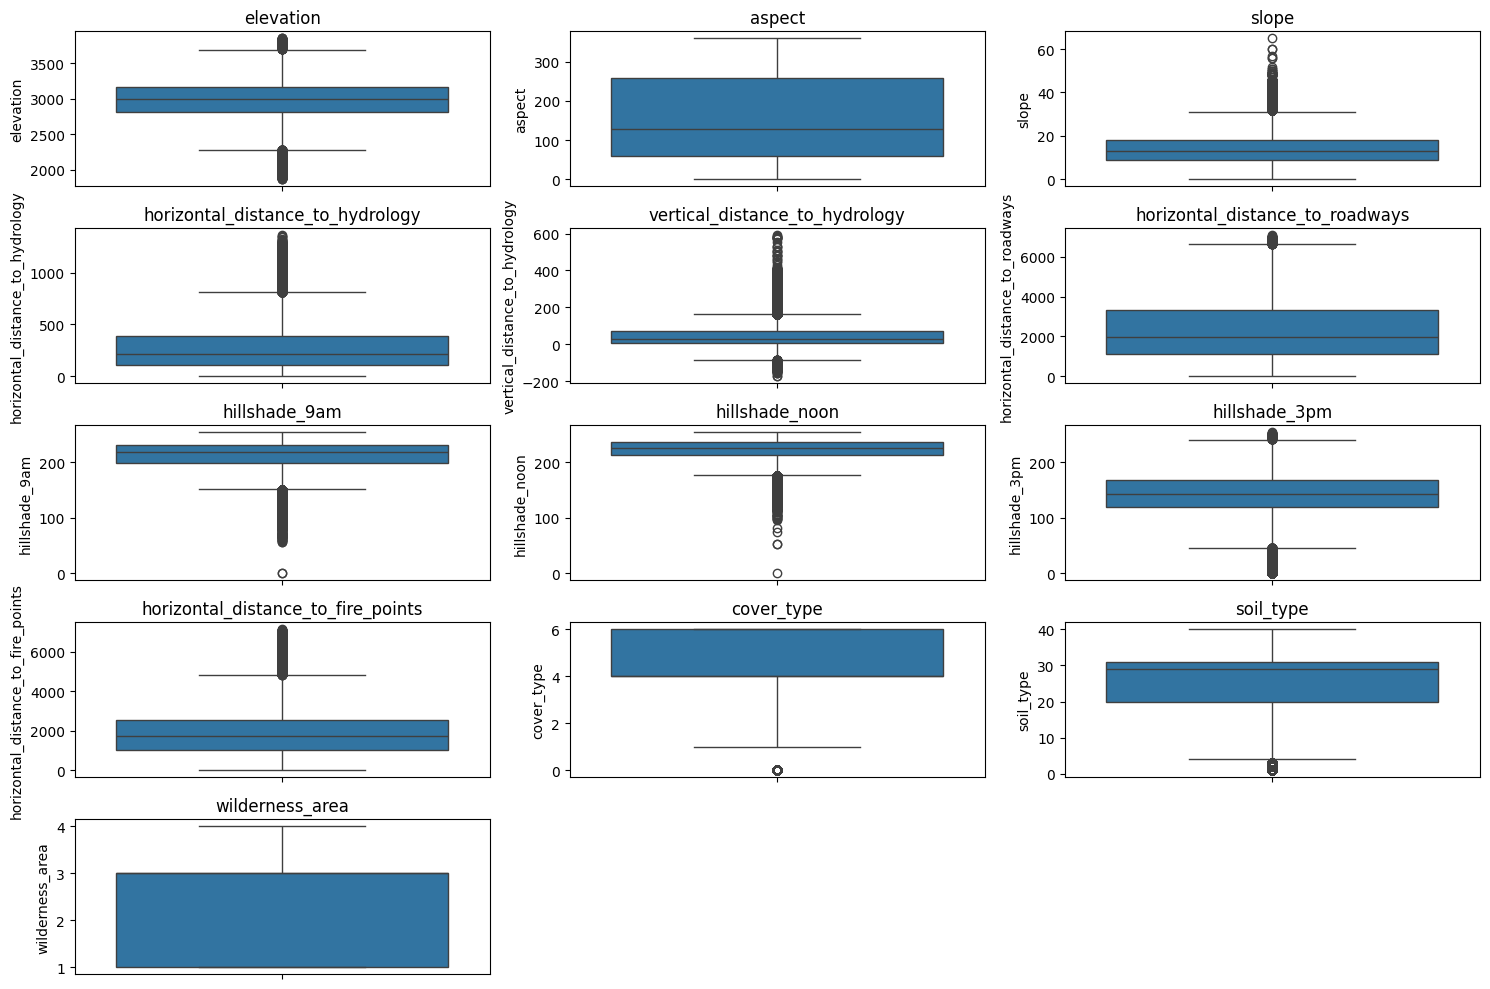

In [ ]:
# selecting only numeric variables to check for the ouliers
numerical_columns = forest_df.select_dtypes(include = ['float64', 'int64']).columns

# create a figure with barplot subplots
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)
    sns.boxplot(y = forest_df[feature], showfliers = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

We can see that the `vertical_distance_to_hydrology`, `horizontal_distance_to_hydrology`, `horizontal_distance_to_fire_points`, `hillshade_9am`, `hillshade_noon`, and `slope` variables have significant number of outliers. For better insigts, we examine their relationship with each forest cover type, i.e., our dependent variable:

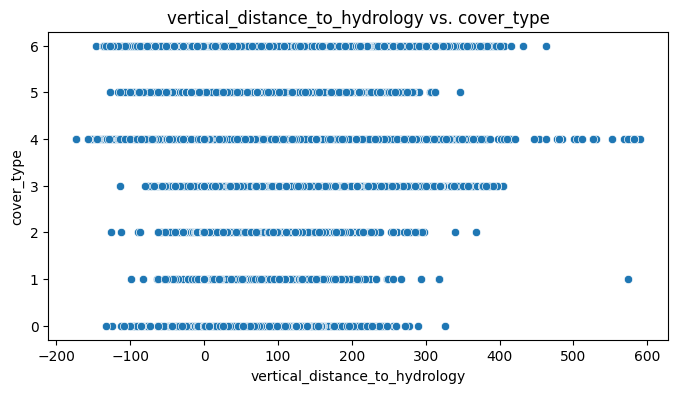

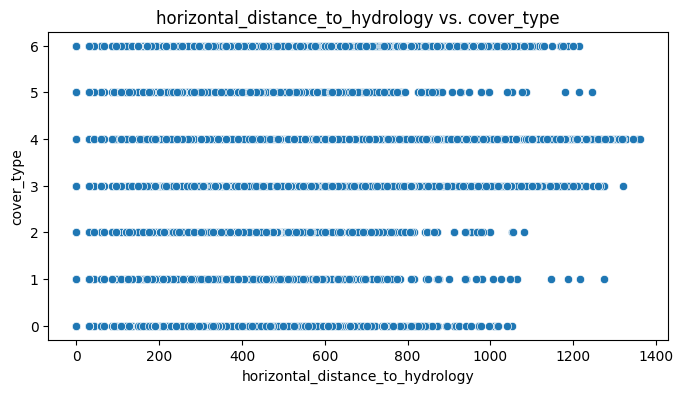

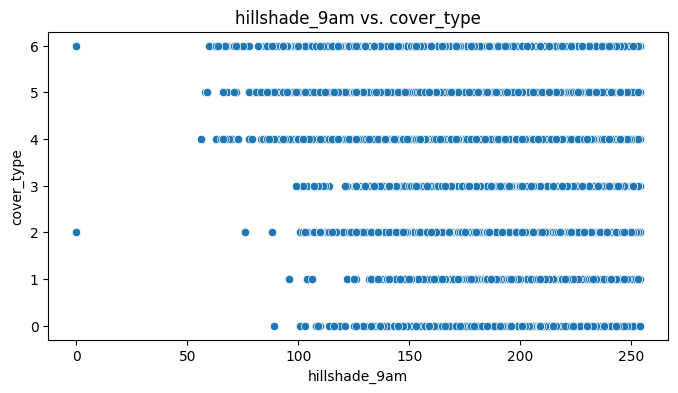

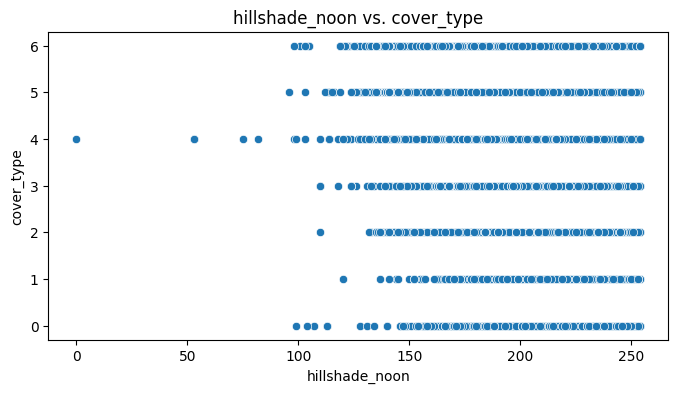

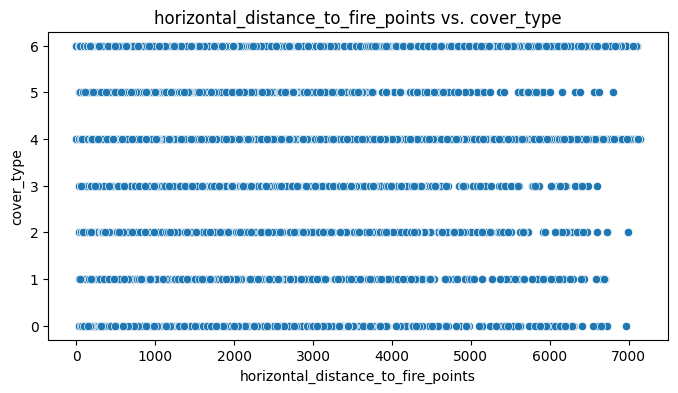

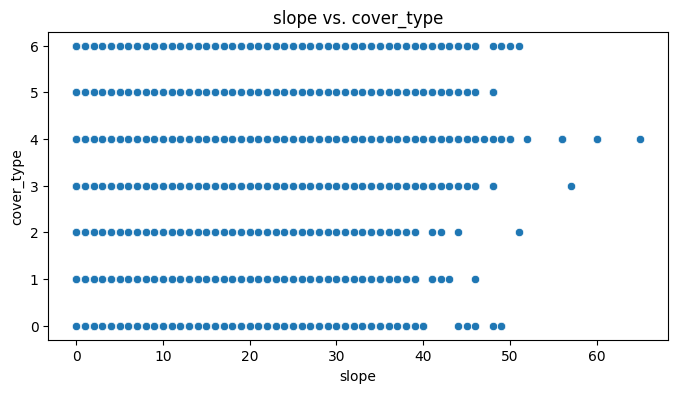

In [ ]:
#selecting the variables with the highest number of outliers
variables_to_check = ['vertical_distance_to_hydrology', 'horizontal_distance_to_hydrology',
                      'hillshade_9am', 'hillshade_noon', 'horizontal_distance_to_fire_points', 'slope']

# plotting the scatter plots to compare the variables with the target one
for var in variables_to_check:
    plt.figure(figsize = (8, 4))
    sns.scatterplot(x = forest_df[var], y = forest_df['cover_type'])
    plt.title(f'{var} vs. cover_type')
    plt.show()

It appears that the outliers don't seem to have a strong pattern across the different cover types, most cover types span full range for majority of the variables. For the distance variables, they might represent rare but meaningful conditions. For instance, some cover types are far from or at extreme distances to hydrology.

However, the values below 50 for the `hillshade_9am` and values below 100 for `hillshade_noon`  occur infrequently and more scattered, thus, we decided to remove them:

In [ ]:
# displaying number of rows of original data set
print("Original data set shape:", forest_df.shape[0])

# removing the outliers
forest_df = forest_df[(forest_df['hillshade_9am'] >= 50) & (forest_df['hillshade_noon'] >= 100)]

# displaying number of observations after removing the outliers
print("New data set shape:", forest_df.shape[0])

Original data set shape: 110393
New data set shape: 110381




We discarded only twelve observations.

In [ ]:
# converting cover_type, soil_type, wilderness_area continuous variables into categorical variables
forest_df[['cover_type', 'soil_type', 'wilderness_area']] = forest_df[['cover_type', 'soil_type', 'wilderness_area']].astype('category')
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110381 entries, 0 to 110392
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   elevation                           110381 non-null  float64 
 1   aspect                              110381 non-null  float64 
 2   slope                               110381 non-null  float64 
 3   horizontal_distance_to_hydrology    110381 non-null  float64 
 4   vertical_distance_to_hydrology      110381 non-null  float64 
 5   horizontal_distance_to_roadways     110381 non-null  float64 
 6   hillshade_9am                       110381 non-null  float64 
 7   hillshade_noon                      110381 non-null  float64 
 8   hillshade_3pm                       110381 non-null  float64 
 9   horizontal_distance_to_fire_points  110381 non-null  float64 
 10  class                               110381 non-null  object  
 11  cover_type        

### Variable Classification:
- **elevation**: Continuous
 - Represents the height of a point above sea level in meters.
- **aspect**: Continuous
 - Shows compass direction that a slope faces (measured in degrees azimuth). 0 degrees usually means North, 90 - East, 180 - South, 270 - East.
- **slope**: Continuous
 - The extent that a soil surface has an incline relative to the horizontal. Measured in degrees.
- **horizontal_distance_to_hydrology**: Continuous
 - Horizontal distance to nearest surface water feautures in meters.
- **vertical_distance_to_hydrology**: Continuous
 - Vertical distance to nearest surface water features in meters.
- **horizontal_distance_to_roadways**: Continuous
 - Horizontal distance to nearest roadways in meters.
- **hillshade_9am**: Continuous
 - Illumination of the Earth's surface at 9am, summer solstice.
- **hillshade_noon**: Continuous
 - Illumination of the Earth's surface at noon, summer solstice.
- **hillshade_3pm**: Continuous
 - Illumination of the Earth's surface at 3pm, summer solstice.
- **horizontal_distance_to_fire_points**: Continuous
 - Horizontal distance to nearest wildfire ignition points.
- **cover_type**: Categorical
 - 1 to 7 Forest cover type designation
- **soil_type**: Categorical
 - 1 to 40 Soil type designation
- **wilderness_area**: Categorical
 - Four wilderness areas that represent forests with minimal human-caused disturbances.

In [ ]:
# calculate VIF for each feature
vif_data = pd.DataFrame() #make a datafarme
vif_data["feature"] = df_num.columns #only numeric values are included
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                              feature          VIF
0                           elevation   149.898715
1                              aspect     5.462801
2                               slope     5.070846
3    horizontal_distance_to_hydrology     4.711410
4      vertical_distance_to_hydrology     2.994611
5     horizontal_distance_to_roadways     4.246041
6                       hillshade_9am   616.179577
7                      hillshade_noon  1199.709169
8                       hillshade_3pm   248.215579
9  horizontal_distance_to_fire_points     3.771798


We do not have any NAs, so we can continue with the **Exploratory Data Analysis**.

## Exploratory Data Analysis

### Continuous Variables

In [ ]:
forest_df.describe().map(lambda x: f"{x:0.3f}")

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points
count,110381.000,110381.000,110381.000,110381.000,110381.000,110381.000,110381.000,110381.000,110381.000,110381.000
mean,2958.002,155.393,14.091,269.783,46.549,2346.101,212.225,223.386,142.521,1979.302
std,280.162,111.753,7.460,212.265,58.075,1558.400,26.797,19.629,38.276,1322.651
min,1871.000,0.000,0.000,0.000,-173.000,0.000,56.000,101.000,0.000,0.000
25%,2808.000,58.000,9.000,108.000,7.000,1104.000,199.000,213.000,119.000,1022.000
50%,2995.000,127.000,13.000,228.000,30.000,1991.000,218.000,226.000,143.000,1710.000
75%,3162.000,259.000,18.000,390.000,69.000,3326.000,231.000,237.000,168.000,2553.000
max,3850.000,360.000,57.000,1361.000,590.000,7087.000,254.000,254.000,254.000,7142.000


**elevation**


*  The trees in these dataset tend to be located in elevated areas ranging from 1871 meters to 3850 meters, this is not rare considering that Colorado (the state where this data was collected)  is considered the highest state of the United States.  
* The median indicates that 50% of observations have an elevations that is 2995 meters or lower, while the other half has a higher elevation. Only 25% of observations are in the range 3162 meters to 3850 meters.

**aspect**
*  Has a minimum of 0 degrees and a maximum of 360 degrees. This range makes sense as a compass has 360 degrees.
* The mean aspect is 155.363 degrees (South East). Considering the range of the sample we can detrmine this variable has a high standard deviation (111.753 degrees), thus there is a wide disparity in aspect across trees.   


**slope**

*   Slope has a minimum of 0 degrees indicating some trees are in flat areas. The maximum incline in areas where these trees grow is of 57 degrees, which is super steep considering that the black/hardest slopes at ski resorts tend to have a slope greater than 40% or 21.8 degrees (Bieswanger, 2022).
*  Slope has a mean of 14.091 degrees and a standard deviation of 7.460 degrees indicating some slight variation in the dataset.
*  75% of observations have a slope of 18 degrees or less, hence most trees in this dataset are located in flat to steep areas. The other 25% of tress are located in steep to extremely steep areas.  


**vertical and horizontal distance to hydrology**
* The vertical distance to hydrology ranges from -173 meters to 590 meters. The vertical distance can be negative as it is possible for the closest body of water to be at a higher altitude than a tree. In other words, trees can be below water level.
* Horizontal distance has a wider range from 0 meters to 1361 meters. It's minimum represents that there are some trees right next to bodies of water.
75% of observations have a horizontal distance of 390 meters or less and that the maximum value is 1361 meters.
* horizontal_distance_to hydrology has a mean of 269.783 meters while vertical_distance_to hydrology has a mean of 46.549 meters. Overall trees tend to be vertically closer to body's of waters than horizontally.

**horizontal_distance_to_roadways**
* The miniumum of 0 indicates that there are trees/areas right next to the roadways. The maximum distance between a tree and a roadway in this dataset is 7087 meters.
* Distance to roadways has a mean of 2346.101 meters but the high standard deviation of 1558.400 meters indicates that there is significant variation across some observations. Some trees tend to be way closer to roadways than others.

**horizontal_distance_to_fire_points**
* The minimum distance of 0 indicates that some trees are at a wildfire ignition point. The farthest trees are from a fire point in this dataset is 7142 meters from it.
* On average, tree's distance to fire points is 1979.302 meters. It's high standard deviation (1322.651 meters) suggests that there is considerable variation across distances.

**hillshade index at 9am, 3pm, and noon**
* All the variables that capture hillshade index have the same range 0-254, which is not surprising considering that this index goes from 0 to 255. A value of 0 signifies complete shadow, while 255 complete sun.
* Out of all the hillshade variables noon has the highest mean 223.371 meters, followed by 9am with a mean of 212.215 and 3pm with 142.513 meters. This is consistent with our expectation as solar noon in Northern Colorado tends to happen at around 12-13 pm (Solar Calculator - NOAA Global Monitoring Laboratory, n.d.). Solar noon represents the time where the sun is at it's highest point, since it is usally around noon we expected the hillshade at that time to be generally the highest as there would be less shade.  
* The low standard deviation of these variables indicates low disparity in hillshade across areas. Although still low, hillshade_3pm standard deviation 38.276 is nearly twice as large as hillshade_noon's (19.629) indicating that the former has more disparity between observations.



### Correlation

We want to see if there is an association between the variables. The correlation heatmap below shows the correlation coefficients between numeric features:


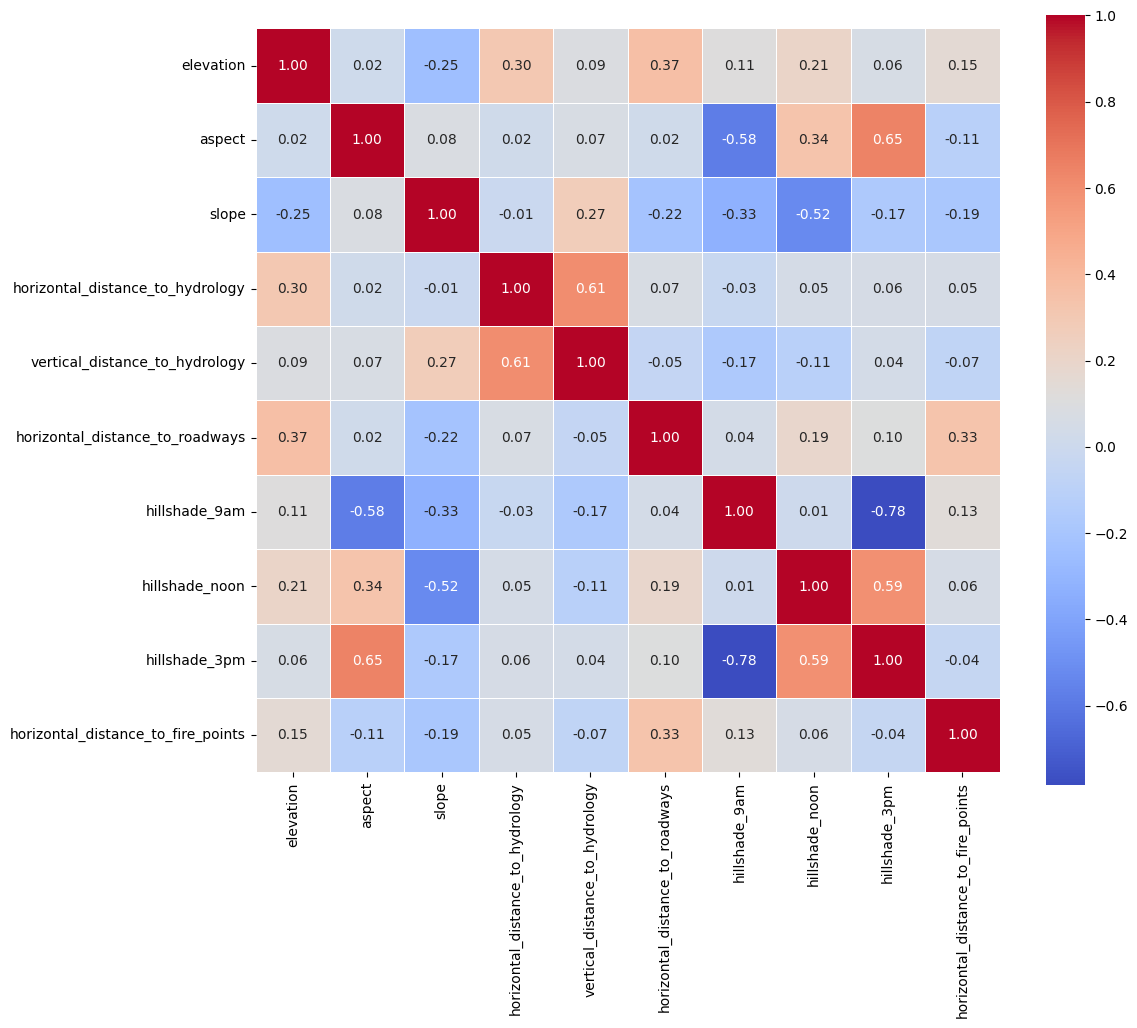

In [ ]:
# include numeric variables only
df_num = forest_df.select_dtypes(include = np.number)

# correlation map
cormat = df_num.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(cormat, annot = True, fmt = ".2f", cmap = 'coolwarm',
            square = True, linewidths = .5) #include correlation coefficents in decimals, set the color
plt.show()

* `Hillshade 3pm` and `Hillshade 9am` have a strong negative correlation (-0.78), which makes sense since slopes that are well-lit at 9am will, most likely, be in the shadow at 3pm.

* `aspect` variable has a quiet strong positive relationship with the `hillshade_3pm`, meaning slopes that have higher aspect (for instance, facing West) have more sunlight in the afternoon.

* Similar with the negative relationship between `aspect` and `hillshade_9am`. Higher the aspect of the slope, less morning sunlight it receives.

* Variables `horizontal_distance_to_hydrology` and `vertical_distance_to_hydrology` also have somewhat strong positive relationship with the corr coefficient of 0.61. Bodies of water are usually located at lower elevations. If the horizontal distance between the location and nearest water body increases, then there is a chance that the location is at the higher elevation as well. This relationship is stronger for the mountain and hilly areas.

* `slope` has a moderate negative relationship with the `hillshade_noon` feature, meaning the steeper the slope is, the more shade it might have at noon.

Correlation coefficients only explain pairwise linear relationship between two variables. To assess **multicollinearity**, Variance Inflation Factor (VIF) diagnostics is used. It measures how much variance of a regression coefficient is inflated due to collinearity with other variables.

Below VIF for each numeric variable can be seen:

### Continuous Variables

The graphs below are univariate

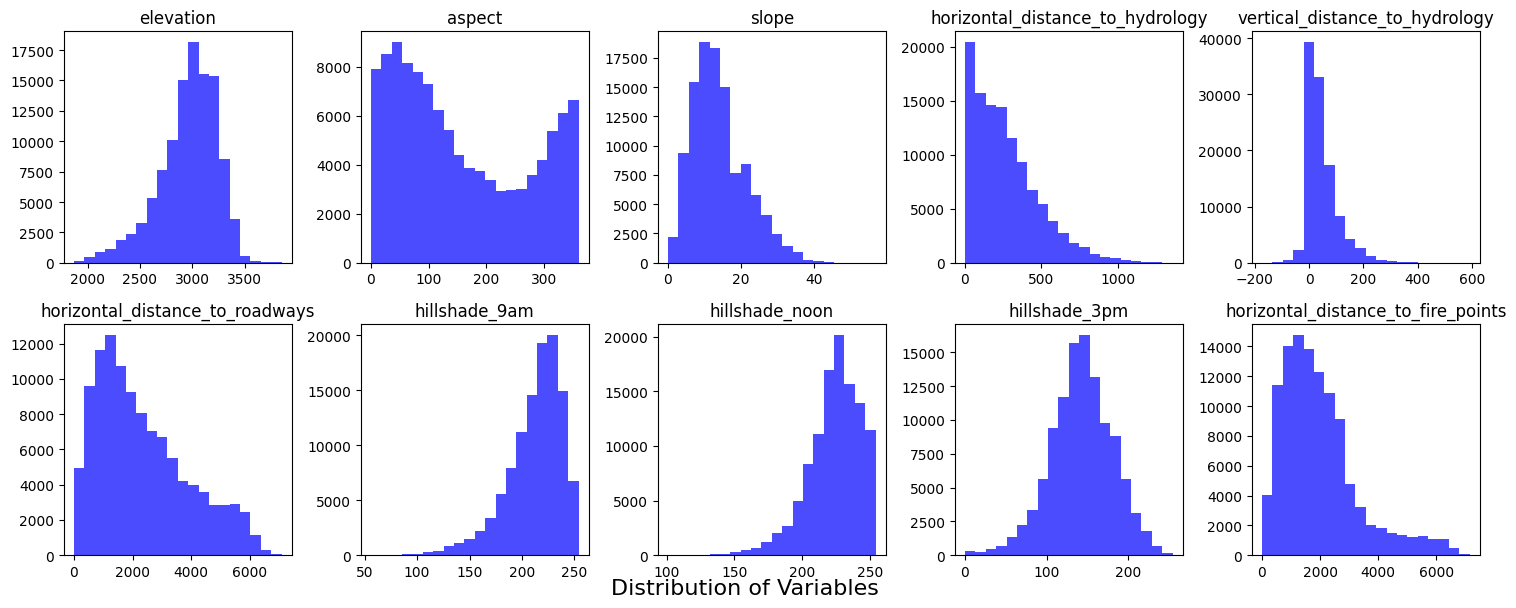

In [ ]:
#selecting only numerical columns
numerical_columns = forest_df.select_dtypes(include = ['float64', 'int64']).columns

# creating subplots: 2 rows and 5 columns
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 6))  # 2 rows, 5 columns for 10 variables

axes = axes.flatten() # to flatten the axes

# plotting histograms for each numerical variable
for i, col in enumerate(numerical_columns):
    axes[i].hist(forest_df[col], bins = 20, color = 'blue', alpha = 0.7)
    axes[i].set_title(col)

plt.tight_layout() # adjust layout

#placing the title in the bottom, centered
plt.figtext(0.5, 0.0000001, 'Distribution of Variables', ha = 'center', fontsize = 16)
plt.show()

The above plot shows the distribution of our numerical variables.

* The distribution of `elevation` is pretty symmetric (bell-shaped), meaning most data points fall within a central elevation point.

* The distribution of the `aspect` variable is quiet unusual; this shape can be explained by the fact that 0 degree and 360 degrees refer to the same compas direction.

* `slope` is right-skewed, meaning most of the areas are located in flat surfaces, and few on steep ones.

* `hillshade_noon` and `hillshade_9am` are negatively-skewed, meaning there are more areas that receive sunlight in the morning and at noon. The reason might be also because majority of the areas are more-or-less flat.

* all distance points are quiet positively-skewed, indicating majority of the areas are closer to water bodies, as well as fire points.

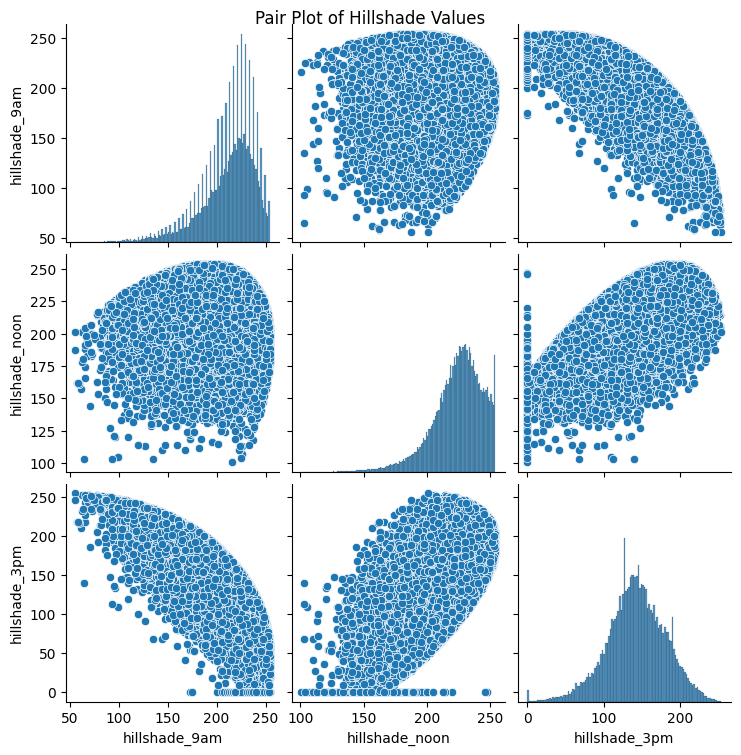

In [ ]:
# Visualize the values of hillshades -- Kim's Code
hillshade_columns = ['hillshade_9am', 'hillshade_noon', 'hillshade_3pm']
sns.pairplot(forest_df[hillshade_columns])
plt.suptitle('Pair Plot of Hillshade Values', y = 1)
plt.show()

The graphs above are bivariate and show the relationship between hillshade variables. As it can be seen in the graph, hillshade_9am and hillshade_3pm have a negative relationship (downwards curve).
### Categorical Variables

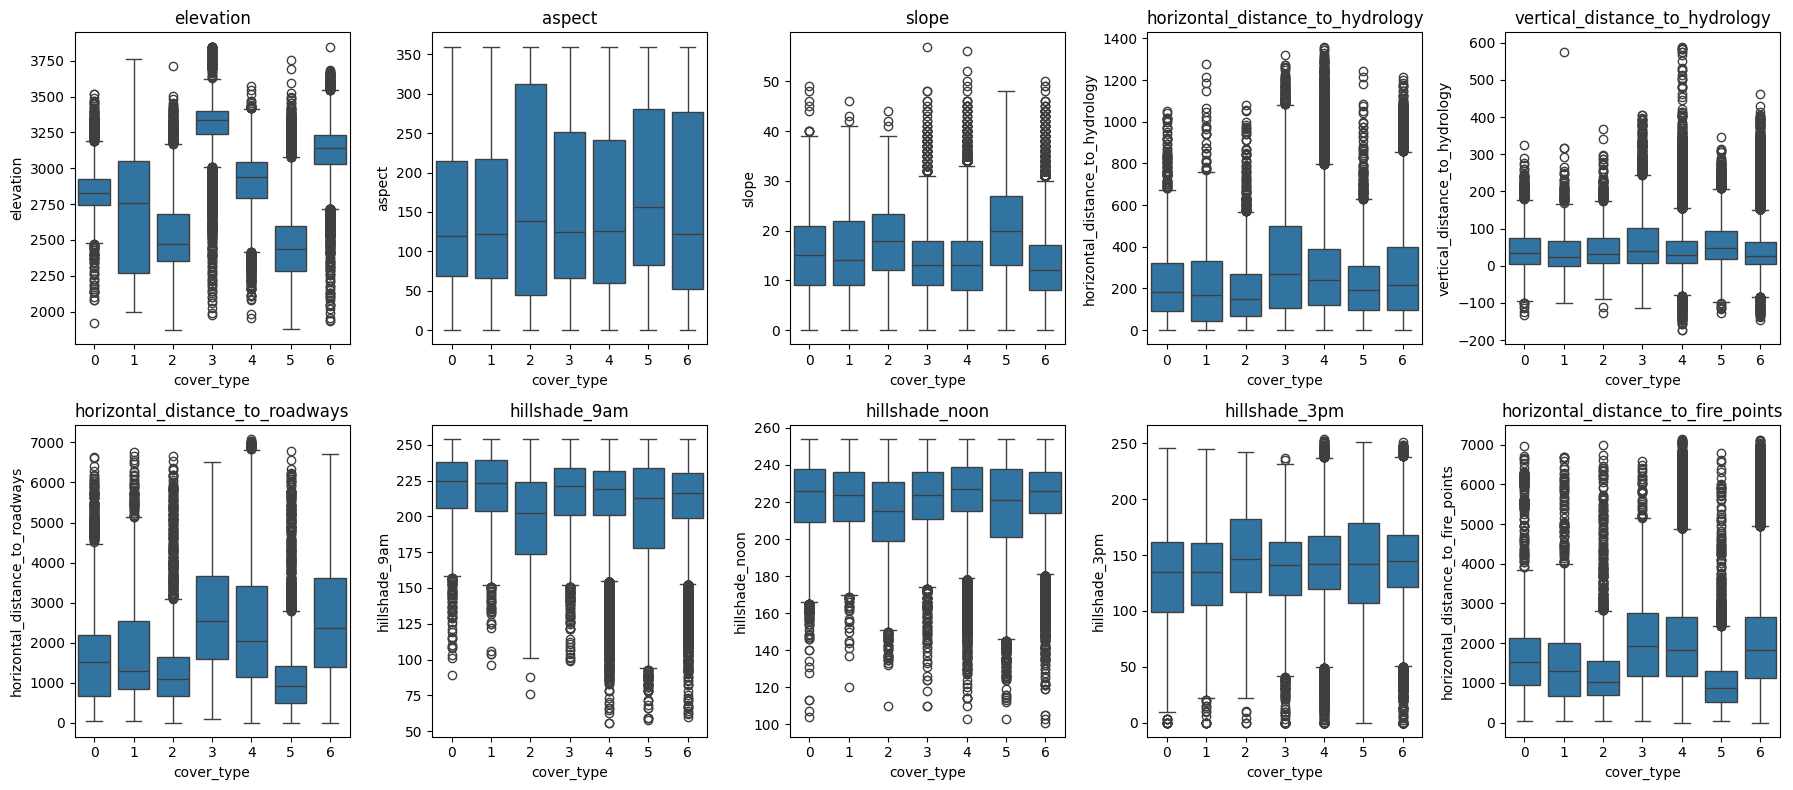

In [ ]:
# create subplots
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (18, 8))

# flatten the axes array for easier iteration
axes = axes.flatten()

# plot boxplots for each continuous variable we have
for i, col in enumerate(numerical_columns):
    sns.boxplot(x = 'cover_type', y = col, data = forest_df, ax = axes[i])
    axes[i].set_title(col)

# adjust layout
plt.tight_layout()

plt.show()

`elevation` feature shows clear differences between cover types. Cover types 4, 6 are found in higher elevations and types 0, 1, 2 with the lower one. ELevation might be a key feature in determining the type of forest cover.

The differences in spread are also seen in the `horizontal_distance_to_roadways`. Cover types 4, 5 seem to be further from the roadways.




<ipython-input-25-f059128b8e36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='soil_type', data=forest_df, order=sorted(forest_df['soil_type'].unique()),


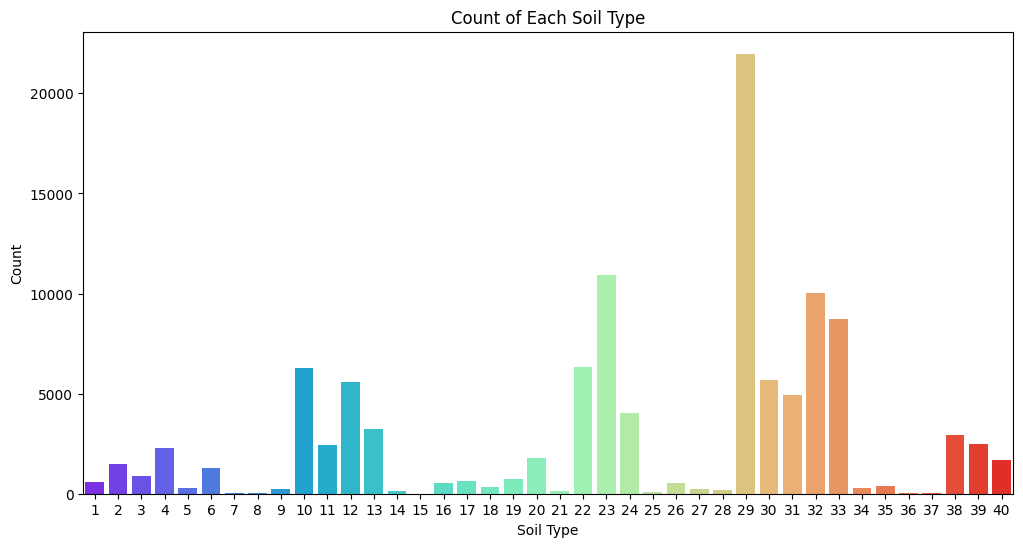

In [ ]:
# Visualizing the counts of soil_type in order -- Kim's Code
plt.figure(figsize=(12, 6))
sns.countplot(x='soil_type', data=forest_df, order=sorted(forest_df['soil_type'].unique()),
              palette='rainbow')

plt.title('Count of Each Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()

The soil type 10 is the most common in the dataset, while the soil type 7 is the least common. This plot shows a clear difference in the distribution of soil types.

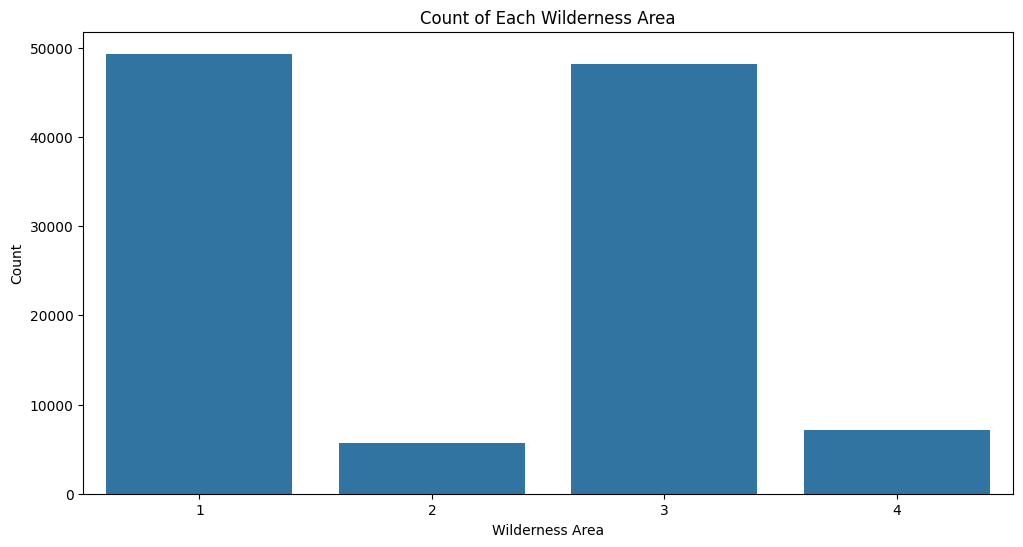

In [ ]:
# Visualizing the counts of wilderness_area in order -- Kim's Code
plt.figure(figsize=(12, 6))
sns.countplot(x='wilderness_area', data=forest_df, order=sorted(forest_df['wilderness_area'].unique()))
plt.title('Count of Each Wilderness Area')
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.show()

The wilderness area 1 and 3 are the most common in the dataset, while the wilderness area 4 and 2 are the least common.

This plot shows a clear difference in the distribution of wilderness areas.


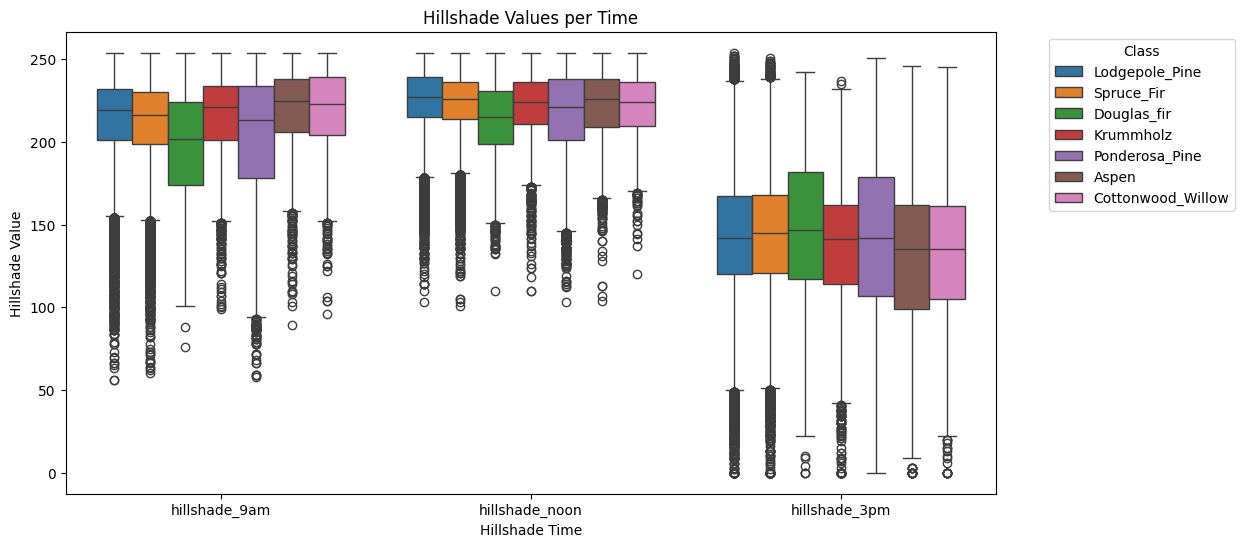

In [ ]:
# Visualize the values for hillshade per time -- Kim's Code
plt.figure(figsize=(12, 6))

# Variables used
hillshade_columns = ['hillshade_9am', 'hillshade_noon', 'hillshade_3pm']
hillshade_melted = forest_df.melt(id_vars=['class'], value_vars=hillshade_columns,
                                  var_name='hillshade_time', value_name='hillshade_value')

sns.boxplot(x='hillshade_time', y='hillshade_value', hue='class', data=hillshade_melted)
plt.title('Hillshade Values per Time')
plt.xlabel('Hillshade Time')
plt.ylabel('Hillshade Value')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The boxplot above shows the distribution of hillshade values at different times of the day. This plot shows that the hillshade_3pm values are lower than the other two hillshade values.

This is most likely caused by the sun's position in the sky at 3pm, which casts more shadows than at 9am and noon.

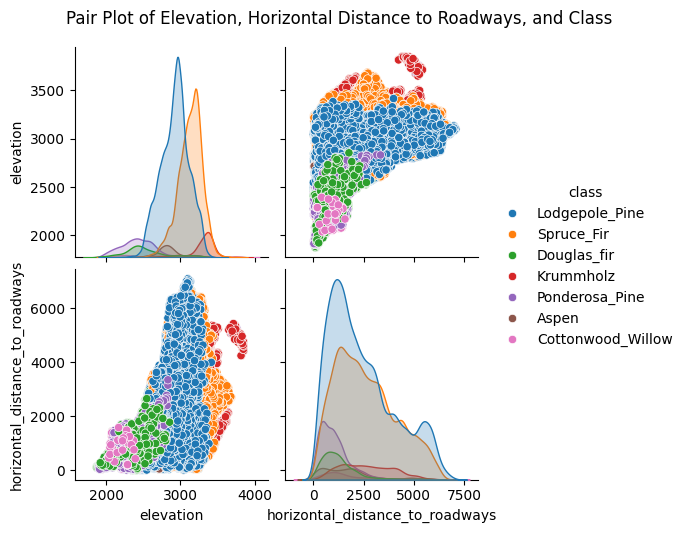

In [ ]:
# Visualize elevation, horizontal distance to roadways, and class -- Kim's Code
sns.pairplot(forest_df, vars=['elevation', 'horizontal_distance_to_roadways'], hue='class')
plt.suptitle('Pair Plot of Elevation, Horizontal Distance to Roadways, and Class',y=1.05)
plt.show()

The pairplot above shows the relationship between elevation, horizontal distance to roadways, and the cover type.

The elevation and the horizontal distance to roadways have the highest correlation with cover_type in the data set, therefore they are plotted together.

The color indicates the cover_type. This plot shows the clear differences in elevation and horizontal distance to roadways between cover types.

These clear distinctions explain why these two variables have such a high correlation with the cover type.

##Resampling

In [ ]:
# calculate the percentage of each class
forest_df['class'].value_counts(normalize=True) * 100

,proportion
class,
Lodgepole_Pine,46.815122
Spruce_Fir,35.245196
Ponderosa_Pine,6.680498
Krummholz,4.084036
Douglas_fir,3.594822
Aspen,2.367255
Cottonwood_Willow,1.213071


Some classes of the Forest Cover Type are underrepresented: the smallest class represents only 1% of our data. This shows that our data is pretty imbalanced.
To tackle the imbalance problems, we can:
1. Oversample the minority class;
2. Undersample the majority class;
3. combine the above mentioned methods.

We are trying first two of these methods to compare how our model accuracies will differ with each of them. First, we oversample the minority class:

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# splitting data into X and y
y = forest_df['class']
X = forest_df.drop(['class', 'cover_type'], axis=1)

# Splitting the dataset into training and test, because only training needs to be resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling
sm = SMOTE(random_state = 42, sampling_strategy = 'not majority')
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)



The new dataset is called `forest_df_res`. Let's check what are the proportions of each cover type class now:

In [ ]:
# checking if the oversampling worked
y_train_res.value_counts(normalize=True) * 100

,proportion
class,
Lodgepole_Pine,14.285714
Spruce_Fir,14.285714
Ponderosa_Pine,14.285714
Krummholz,14.285714
Aspen,14.285714
Douglas_fir,14.285714
Cottonwood_Willow,14.285714


From the table above, we can see that the proportions of observations belonging to each forest cover type are equal.

Next, we are creating a different data set `forest_df_unders` with the undersampled majority class:

In [ ]:
#In case we want to try undersampling too
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_train_unders, y_train_unders = undersample.fit_resample(X_train_scaled, y_train)


In [ ]:
#checking if undersampling worked
y_train_unders.value_counts(normalize=True) * 100

,proportion
class,
Aspen,14.285714
Cottonwood_Willow,14.285714
Douglas_fir,14.285714
Krummholz,14.285714
Lodgepole_Pine,14.285714
Ponderosa_Pine,14.285714
Spruce_Fir,14.285714


In [ ]:
print(f"number of rows in the original data: {X.shape[0]}")
print(f"number of rows in the oversampled data: {X_train_res.shape[0]}")
print(f"number of rows in the undersampled data: {X_train_unders.shape[0]}")

number of rows in the original data: 110381
number of rows in the oversampled data: 288939
number of rows in the undersampled data: 7553


# Part 3. Classification Models

In this third pard, we are bulding two different models for classification regression: SVM and Random Forest. The reasons behind choosing these models are described in the first part of this assignment. The models are run for both balanced and unbalanced datasets. Additionally, certain feauture selection methods are used in order to achive most accurate results (based on importance of features measures)

After, the models and their metrics are compared.



## Model 1. Support Vector Machine

A Support Vector Machine (SVM) is a supervised ML algorithm that classifies data by finding an optimal line (or plane) that maximizes the distance between each class in an N-dimensional space.

SVM has several implementations. One of them is Support Vector Classification (SVC). Another popular one Linear Kernel SVM that is used when data can be separated using a single line, however the computational time for Linear Kernel was too big, thus only SVC model was built.

In [ ]:
# packages needed for the SVM model
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# This first model is a Support Vector Machine with one vs one comparisons
clf_ovo = svm.SVC(decision_function_shape='ovo')

### SVC on Unbalanced data

First, running on the unbalanced data set:

In [ ]:
# training SVC model
clf_ovo.fit(X_train_scaled, y_train)

# One vs One Prediction
svc_unbalanced_pred = clf_ovo.predict(X_test_scaled)
print(svc_unbalanced_pred)

# Evaluate the model performance
accuracy = accuracy_score(y_test, svc_unbalanced_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, svc_unbalanced_pred)
print(f"Classification report: {report}")

['Ponderosa_Pine' 'Spruce_Fir' 'Lodgepole_Pine' ... 'Douglas_fir'
 'Lodgepole_Pine' 'Spruce_Fir']
Accuracy: 0.7482447796349142
Classification report:                    precision    recall  f1-score   support

            Aspen       0.76      0.07      0.12       523
Cottonwood_Willow       0.74      0.10      0.18       260
      Douglas_fir       0.65      0.23      0.34       788
        Krummholz       0.82      0.57      0.67       925
   Lodgepole_Pine       0.76      0.84      0.80     10398
   Ponderosa_Pine       0.68      0.78      0.73      1475
       Spruce_Fir       0.75      0.76      0.75      7708

         accuracy                           0.75     22077
        macro avg       0.74      0.48      0.51     22077
     weighted avg       0.75      0.75      0.73     22077



The accuracy coefficient shows that our SVM model predicted 74.8% of observations correctly.

### SVC with the undersampled data:

In [ ]:
# One vs One classifier undersampled
clf_ovo.fit(X_train_unders, y_train_unders)

# One vs One Prediction
svc_unders_pred = clf_ovo.predict(X_test_scaled)
print(svc_unders_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, svc_unders_pred)
print(f"Accuracy: {accuracy}")

['Ponderosa_Pine' 'Krummholz' 'Aspen' ... 'Douglas_fir' 'Ponderosa_Pine'
 'Spruce_Fir']
Accuracy: 0.6037958055895276


As we can see, the accuracy has dropped from 74.8% to 60.4%.

### SVC with the oversampled data:

In [ ]:
# training SVC model
clf_ovo.fit(X_train_res, y_train_res)

# One vs One Prediction
svc_overs_pred = clf_ovo.predict(X_test_scaled)
print(svc_overs_pred)

# Evaluate the model performance
accuracy = accuracy_score(y_test, svc_overs_pred)
print(f"Accuracy: {accuracy}")

['Ponderosa_Pine' 'Krummholz' 'Lodgepole_Pine' ... 'Douglas_fir'
 'Lodgepole_Pine' 'Spruce_Fir']
Accuracy: 0.6627712098564117


So far, the accuracy score for the unbalanced dataset is slightly higher compared to those of the balanced ones. With the oversampled data, it might be due to the fact that the *Recall* for the minority class was improved at the cost of accuracy for the majority class.

In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1-score
f1_unb = f1_score(y_test, svc_unbalanced_pred, average='weighted')
print(f"F1-Score for unbalanced data: {f1_unb}")
f1_over = f1_score(y_test, svc_overs_pred, average='weighted')
print(f"F1-Score for oversampled data: {f1_over}")

F1-Score for unbalanced data: 0.7320965324084348
F1-Score for oversampled data: 0.6827897447774931


The F1-score for the oversampled data is still lower.

# Random Forest
Random Forest is a popular machine learning technique that can be used both for classification and regression tasks. How the model works is that several decision trees are calculated and combined to provide a single result. A decison-tree is another algorithm that has a tree-like structure were decision rules/nodes split the data (IBM, n.d.).

Oftentimes, to make the model more interpretable and prevent overfitting pre-pruning and post-pruning techniques are applied to decision trees. However, when it comes to pruning decision trees in Random Forest the literature is split. Some experts argue that bagged trees should be grown to full-depth while other believe that hyparameter tuning could drastically imporve performance (Zhou and Mentch, 2021). The latter approaches, however, are outside the scope of this project as they require hyperparameter tuning with grid search and other techniques to find the optimal depth of decision trees, the minimum number of samples for each node, etc.  

In this paper, full-depth trees will be grown and importance of features measures will be used, if necessary, to imporve model performance.




## Random Forest with Unbalanced Data
First, a model is run on the ubalanced dataset with all the predictors.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
# Running RF with unbalanced/original dataset
rf_unb = RandomForestClassifier(random_state = 42)
rf_unb.fit(X_train_scaled, y_train) # fitting our data into the model

RandomForestClassifier(random_state=42)

In [ ]:
# Measuring the accuracy of the RF model on the train set and test set
print("Test Accuracy:", accuracy_score(y_test, rf_unb.predict(X_test_scaled)))

print('Training Accuracy :', accuracy_score(y_train, rf_unb.predict(X_train_scaled)))

Test Accuracy: 0.878561398740771
Training Accuracy : 0.9870221054538866


The model has an accuracy of 87.9% on the test data, which is around 10% less than the accuracy of the model using the training set. This suggests the model might be overfitting the dataset. To reduce this, the dimensionality of the model will be reduced by removing unimportant features.

The figure below illustrate the relevance of each feature in the random forest model when predicting the class.


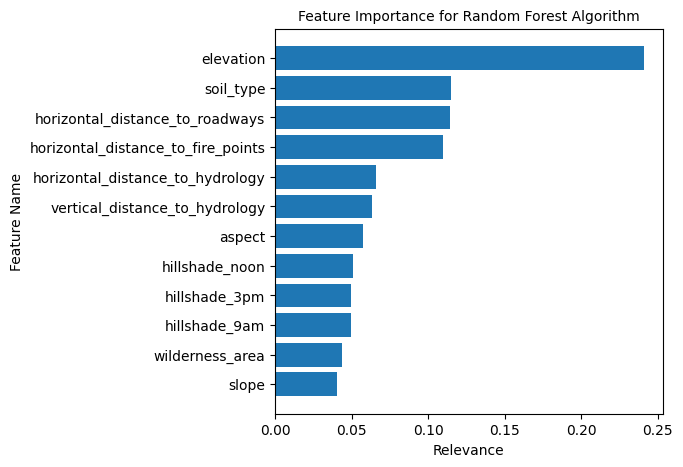

In [ ]:
feat_imp = rf_unb.feature_importances_

# Converting X_train_scaled back into a DataFrame with original column names so corresponding labels and values appear in graph
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)

# sorting the feature importances and corresponding feature names
sorted_indices = np.argsort(feat_imp)  # Getting indices of sorted importance values (ascending order)
sorted_feat_names = X_train_scaled_df.columns.values[sorted_indices]  # Sorting feature names by importance
sorted_feat_imp = feat_imp[sorted_indices]  # Sorting the feature importance values

# plotting a feature of importance plot with relevance/importance as x axis and feature names as y
plt.figure(figsize=(5, 5))
plt.barh(sorted_feat_names, sorted_feat_imp)  # Horizontal bar plot
plt.title('Feature Importance for Random Forest Algorithm', fontsize=10)
plt.ylabel('Feature Name')
plt.xlabel('Relevance')
plt.show()

Elevation has the highest importance in the model, followed by soil_type, horizontal_distance_to_roadways, and horizontal_distance_to_fire_points. The least important variables when predicting class are slope, wilderness_area, and the hillshade variables.

Based on these results, the variables slope, wilderness_area, hillshade_9am, hillshade_3pm, and hillshade_noon will be removed from the new model as they have a noticeably lower level of importance than the others.



In [ ]:
# dropping variables 'hillshade_9am', 'hillshade_noon', "hillshade_3pm" 'slope', 'wilderness_area' from X_train_scaled
X_train_scaled_df_del_feat = X_train_scaled_df.drop(['hillshade_9am', 'hillshade_noon', "hillshade_3pm", 'slope', 'wilderness_area'], axis=1)

# converting X_test_scaled back into a DataFrame with original column names so coulmns can be dropped
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_train.columns)

# dropping variables 'hillshade_9am', 'hillshade_noon', "hillshade_3pm" 'slope', 'wilderness_area' from X_test_scaled
X_test_scaled_df_del_feat = X_test_scaled_df.drop(['hillshade_9am', 'hillshade_noon', "hillshade_3pm", 'slope', 'wilderness_area'], axis=1)

In [ ]:
# running new RF model with fewer features
rf_unb_del_feat = RandomForestClassifier(random_state = 42)
rf_unb_del_feat.fit(X_train_scaled_df_del_feat, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Printing accuracies of new model on the train and test set
print("Test Accuracy:", accuracy_score(y_test, rf_unb_del_feat.predict(X_test_scaled_df_del_feat)))

print('Training Accuracy : ',
      accuracy_score(y_train, rf_unb_del_feat.predict(X_train_scaled_df_del_feat)))

Test Accuracy: 0.8814150473343298
Training Accuracy :  0.9869881319079543


By dropping variables 'hillshade_9am', 'hillshade_noon', "hillshade_3pm", 'slope', 'wilderness_area', the model becomes slightly more accurate as accuracy went up to 88%.

## Random Forest with Undersampled Data

Now we are going to run RF models in the undersampled data to see if predictions become more accurate.

In [ ]:
# fitting the model
rf_unders = RandomForestClassifier(random_state = 42)
rf_unders.fit(X_train_unders, y_train_unders)

# predicting the class in the test set
y_pred_unders = rf_unders.predict(X_test_scaled)

# calculating the accuracies of train and test set
print("Test accuracy:", accuracy_score(y_test, y_pred_unders))
print('Training accuracy:', accuracy_score(y_train, rf_unders.predict(X_train_scaled))) # not sure what this predicted x should be

Test accuracy: 0.6259908502060968
Training accuracy: 0.6624954701938757


Not only is the test accuracy low, but the training accuraccy is also low. This is likely due to the undersampled dataset being reduced a lot compared to the original dataset (from roughly 100000 instances down to 7000 instances).

Since the accuracy of the test set is slightly lower than that of the training set, there is some indication of slight overfitting. In hopes of improving the model, another model will be run with less features. To decide what to remove, once again feature importance measures are calculated:

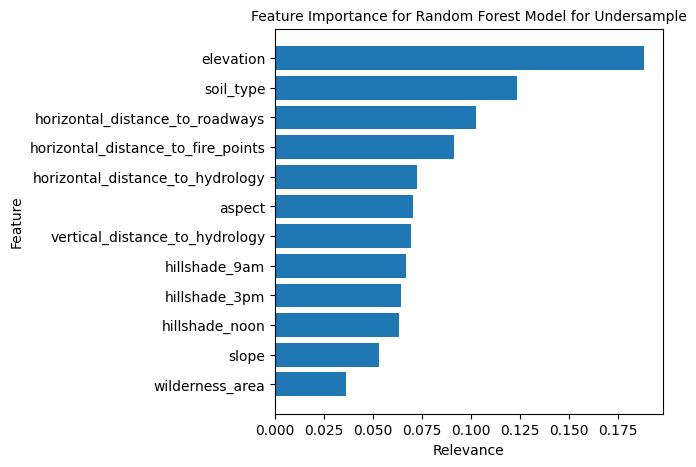

In [ ]:
# Importance of features
feat_dt = rf_unders.feature_importances_

# Converting X_train_scaled back into a DataFrame with original column names so corresponding labels and values appear in graph
X_train_unders_df = pd.DataFrame(X_train_unders, columns= X_train.columns)

# sorting the feature importances and corresponding feature names
sorted_indices_unders = np.argsort(feat_dt)  # Getting indices of sorted importance values (ascending order)
sorted_feat_names_unders = X_train_unders_df.columns.values[sorted_indices_unders]  # Sorting feature names by importance
sorted_feat_imp_unders = feat_dt[sorted_indices_unders]  # Sorting the feature importance values

# checking feature importance
plt.figure(figsize=(5, 5))
plt.barh(sorted_feat_names_unders, sorted_feat_imp_unders)
plt.title('Feature Importance for Random Forest Model for Undersample',fontsize=10)
plt.ylabel('Feature')
plt.xlabel('Relevance')
plt.show()

The graph above shows that elevation is the most important predictor of this model. Soil_type, horizontal_distance_to_roadways, and horizontal_distance_to_fire_points are also strong predictors. Noticeably, slope and wilderness_area have lower prediction power so they will be removed in the new model. The hillshade variables will be included as they have a slighly higher relevance to this model and have really similar level of importance to aspect, horizontal_distance_to_hydrology, and vertical_distance_to_hydrology.

In [ ]:
# dropping variables  'slope', 'wilderness_area' from X_train_scaled
X_train_unders_del_feat = X_train_unders_df.drop(['slope', 'wilderness_area'], axis=1)


# dropping variables 'slope', 'wilderness_area' from X_test_scaled
X_test_unders_del_feat = X_test_scaled_df.drop(['slope', 'wilderness_area'], axis=1)


In [ ]:
# fitting the model
rf_unders_del_feat = RandomForestClassifier(random_state = 42)
rf_unders_del_feat.fit(X_train_unders_del_feat, y_train_unders)

# predicting the class in the test set
y_pred_unders_del_feat = rf_unders_del_feat.predict(X_test_unders_del_feat)

# calculating the accuracies of train and test set
print("Test accuracy:", accuracy_score(y_test, y_pred_unders_del_feat))
print('Training accuracy:', accuracy_score(y_train, rf_unders.predict(X_train_scaled))) # not sure what this predicted x should be

Test accuracy: 0.6165239842369887
Training accuracy: 0.6624954701938757


Feature extraction in this case resulted in a worse model with lower accuracy for the test dataset.  

## Random Forest with Oversampled Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# running random forest model
rf_over = RandomForestClassifier(random_state = 42)
rf_over.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [ ]:
# predicting class/cover type of test set observations
y_pred_over = rf_over.predict(X_test_scaled)

# comparing accuracy of model on the train and test set
print("Test Accuracy:", accuracy_score(y_test, y_pred_over))

y_train_pred_over = rf_over.predict(X_train_scaled)
print('Training Accuracy : ', accuracy_score(y_train, y_train_pred_over))

Test Accuracy: 0.864338451782398
Training Accuracy :  0.9870674035151296


The accuracy of this model is high, but still lower than the accuracy of the training set. This disparity might mean that the model slightly overfits the data. To check this and to possibly increase our model's accuracy a new model will be run without unimportant features.

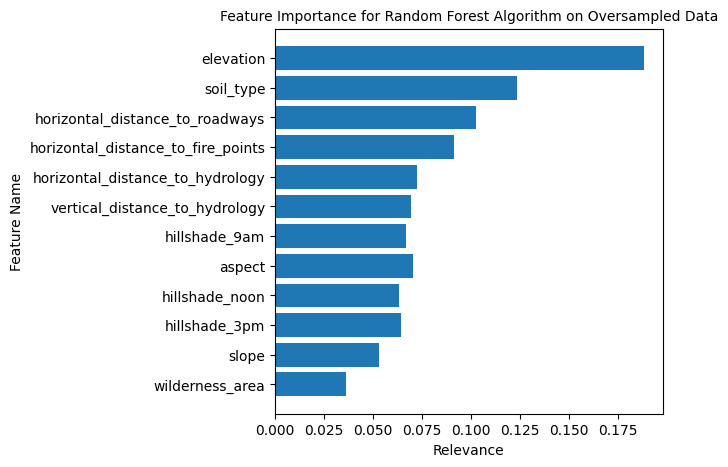

In [ ]:
# Converting X_train_res back into a DataFrame with original column names so corresponding labels and values appear in graph
X_train_over_df = pd.DataFrame(X_train_res, columns= X_train.columns)

# Checking importance of features
feat_over = rf_over.feature_importances_

# sorting the feature importances and corresponding feature names
sorted_indices_over = np.argsort(feat_over)  # Getting indices of sorted importance values (ascending order)
sorted_feat_names_over = X_train_over_df.columns.values[sorted_indices_over]  # Sorting feature names by importance
sorted_feat_imp_over = feat_dt[sorted_indices_over]  # Sorting the feature importance values

plt.figure(figsize=(5,5))
plt.barh(sorted_feat_names_over, sorted_feat_imp_over)
plt.title('Feature Importance for Random Forest Algorithm on Oversampled Data',fontsize=10)
plt.ylabel('Feature Name')
plt.xlabel('Relevance')
plt.show()

The following graph demostrates that elevation is by far the most important predictor to this model. Soil_type, horizontal_distance_to_roadways, and horizontal_distance_to_fire_points also significantly affect predictions. Once again, slope and wilderness_area are dropped based on their low feature of importance scores.  

In [ ]:
# dropping variables  'slope', 'wilderness_area' from X_train_res
X_train_over_df_del_feat = X_train_over_df.drop(['slope', 'wilderness_area'], axis=1)

# dropping variables  'slope', 'wilderness_area' from X_test_scaled
X_test_over_df_del_feat = X_test_scaled_df.drop(['slope', 'wilderness_area'], axis=1)


In [ ]:
# running random forest model
rf_over_del_feat = RandomForestClassifier(random_state = 42)
rf_over_del_feat.fit(X_train_over_df_del_feat, y_train_res)

RandomForestClassifier(random_state=42)

In [ ]:
# predicting class/cover type of test set observations
y_pred_over_del_feat = rf_over_del_feat.predict(X_test_over_df_del_feat)

# Getting the accuracy of the
print("Test Accuracy:", accuracy_score(y_test, y_pred_over_del_feat))

Test Accuracy: 0.8649272999048784


The removal of variables slope and wilderness resulted in a slightly more accurate model (86.49%).

Overall, the RF model with the highest accuracy is the one trained on the unbalanced dataset where features "hillshade_noon", "hillshade_9am", "slope", and "wilderness_area" were removed, hence it will be further explained and compared to the previously selected SVM model.

## Comparing Two Models


Both models performed worse when trained on balanced datasets, compared to the unbalanced original data. For that reason, we decided to proceed further only with the unbalanced dataset. Below, SVM and Random Forest trained on an unbalanced dataset with all features included will be compared. We will start our comparison by looking at the confusion matrices of the two models.

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [ ]:
#Initialize the classifiers
rf = RandomForestClassifier()
clf_ovo = svm.SVC(decision_function_shape='ovo')
models=[clf_ovo, rf]

In [ ]:
#Run predictions
predictions=[]
for m in models:
    m.fit(X_train_scaled, y_train)
    pred_test=m.predict(X_test_scaled)
    pred_train=m.predict(X_train_scaled)
    pred_temp=[pred_test, pred_train]
    predictions.extend(pred_temp)

In [ ]:
#Create confusion matrices

cm_svm = confusion_matrix(y_test, predictions[0])
cm_rf = confusion_matrix(y_test, predictions[2])

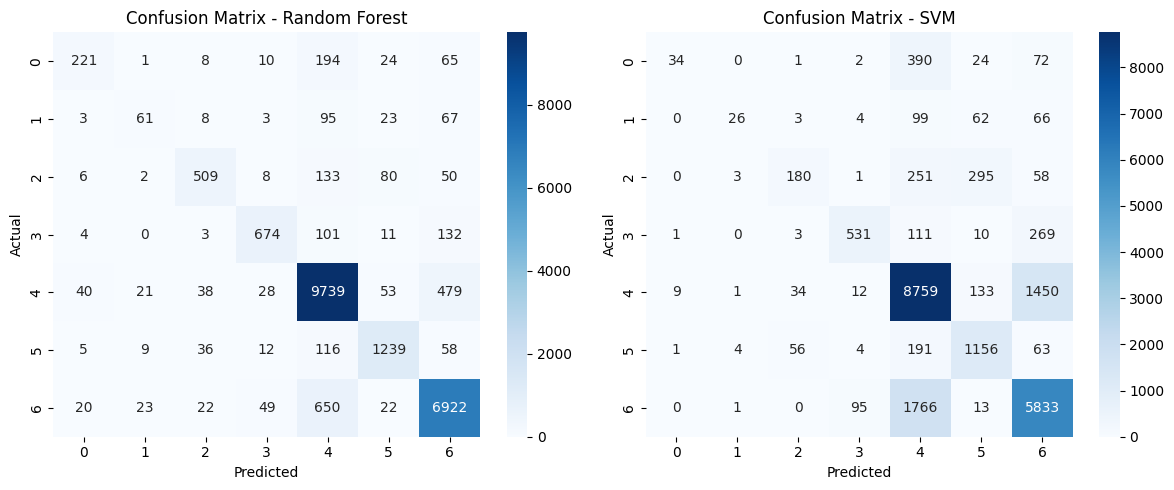

In [ ]:
# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix for Model 1
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix for Model 2
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - SVM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

Looking at the confusion matrices for both models, it can be seen that false positives and false negatives mainly occur at tree cover type 4 (Lodgepole Pine) and 6 (Spruce Fir). It makes sense that the models assign class 4 or 6 to an instance which they have difficulty classifying, since these are the two majority classes. It can also be seen that the Random Forest model is slightly better at predicting class 4 and 6 than the SVM model. To get a more concise, easier to interpret overview, we will compare accuracy and F1 scores of the models. Accuracy is a standard metric which does not take into account class imbalance, thus the F1 score will help us gauge the performance of models in predicting minority classes. To also assess the bias-variance trade-off, we will include training accuracy and F1 scores.

In [ ]:
#Create a list with accuracy scores
correct_class=[y_test, y_train, y_test, y_train]

predictions_correct=zip(predictions, correct_class)

acc_scores=[]

for pred, cor in predictions_correct:
  acc_scores.append(accuracy_score(cor, pred))

In [ ]:
#Create a list with F1 scores
predictions_correct=zip(predictions, correct_class)

f1_scores=[]

for pred, cor in predictions_correct:
  f1_scores.append(f1_score(cor, pred, average='weighted'))

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

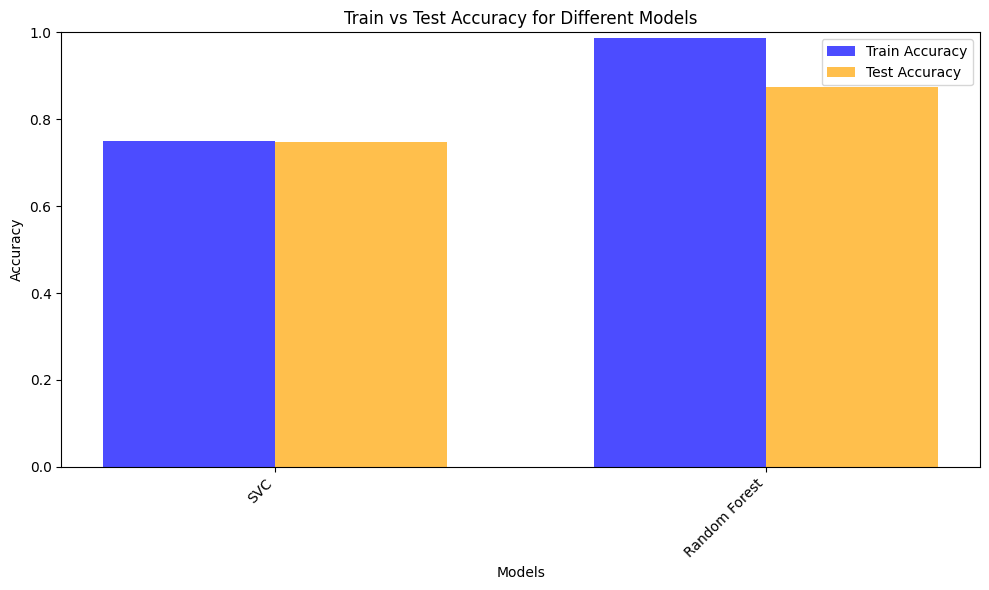

In [ ]:
#Plot the accuracy score

# Accuracy scores and model names
train_acc = [acc_scores[1], acc_scores[3]]
test_acc = [acc_scores[0], acc_scores[2]]
model_names = ['SVC', 'Random Forest']

# Number of models
n_models = len(model_names)

# Set up bar chart positions
index = np.arange(n_models)
bar_width = 0.35  # Width of bars

# Plot bars for train and test accuracy
plt.figure(figsize=(8, 5))
plt.bar(index, train_acc, bar_width, label='Train Accuracy', color='blue', alpha=0.7)
plt.bar(index + bar_width, test_acc, bar_width, label='Test Accuracy', color='orange', alpha=0.7)

# Add labels, title, and custom ticks
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Models')
plt.xticks(index + bar_width / 2, model_names)
plt.ylim(0, 1)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


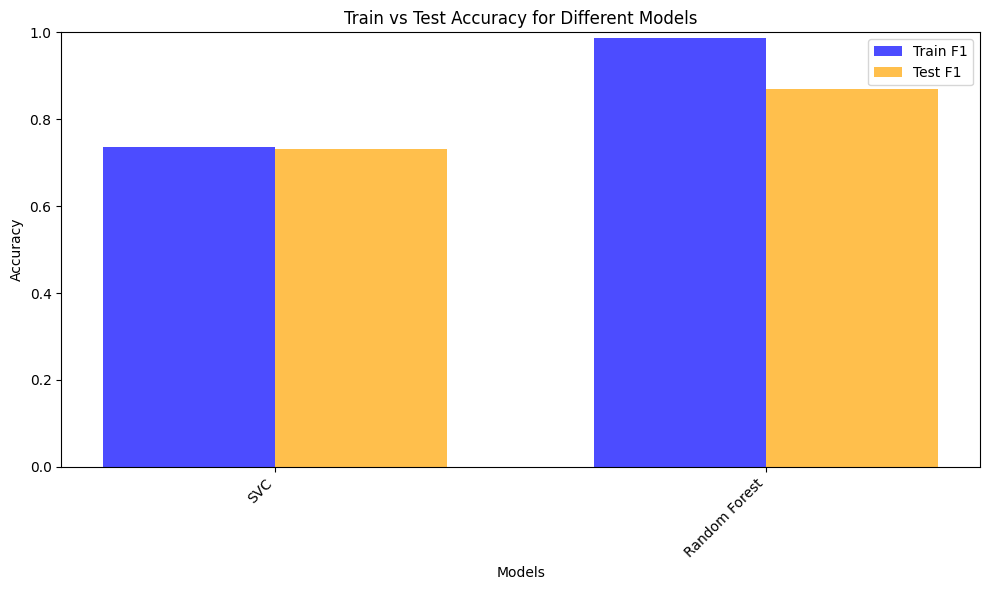

In [ ]:
#Plot the F1 scores

# Accuracy scores and model names
train_f1 = [f1_scores[1], f1_scores[3]]
test_f1 = [f1_scores[0], f1_scores[2]]
model_names = ['SVC', 'Random Forest']

# Number of models
n_models = len(model_names)

# Set up bar chart positions
index = np.arange(n_models)
bar_width = 0.35  # Width of bars

# Plot bars for train and test accuracy
plt.figure(figsize=(8, 5))
plt.bar(index, train_f1, bar_width, label='Train F1', color='blue', alpha=0.7)
plt.bar(index + bar_width, test_f1, bar_width, label='Test F1', color='orange', alpha=0.7)

# Add labels, title, and custom ticks
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Train vs Test F1 Score for Different Models')
plt.xticks(index + bar_width / 2, model_names)
plt.ylim(0, 1)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

As we can see, Random Forest achieves both higher accuracy and higher F1 score compared with the SVC. Random Forest also shows higher overfitting than SVC, with test score being considerably lower than the training score for Random Forest. This can be viewed as a drawback of Random Forest compared to SVC, since it clearly shows higher variance. In addition, Random Forest takes slightly longer than SVC to train, so for larger datasets, this could be seen as an issue. Nevertheless, the test scores are a lot higher for Random Forest vs. SVC, so Random Forest wins in the broader bias vs. variance tradeoff comparison. Therefore, it will be our preferred model.

It should also be mentioned that no hyperparameter tuning was performed. With hyperparameter tuning, we would have likely been able to reduce the variance of the Random Forest model. For example, by pruning the trees, we would have likely been able to reduce the gap between the training and the test scores. It is also possible that by tuning the SVC, better test scores could be achieved. For example, trying different SVC kernels could potentialy help discover non-linear patterns in the data and improve predictions.

Overall, the Random Forest model achieves high accuracy, which allows it to fulfil the goals of this data mining project, mainly identifying the compositions of the forest. With 90% accuracy, we can be quite confident about the forest composition and use this data to advise targeted interventions into forests. Furthermore, high F1 score of almost 0.9 also suggests that the minority classes are predicted well by the models, which is an important point given the unbalanced classes in the dataset.

We will now discuss the findings with regards to the key objectives stated at the beginning. As mentioned in the introduction, the data used in this research was collected from the Roosevelt National Forest of northern Colorado. The EDA and results showed that the Lodgepole Pine and Spruce Fir trees are predominant here. Research indicates that Lodgepole pines have medium wildfire risk, and Spruce Firs have high wildfire risk (Ansley, 2000). This means that the forest area that was examined in this research specifically, has relatively high wildfire risk. It is advisable to take preventative measures to minimize dangers in case of a wildfire and/or maintain the Ponderosa Pines better as these have been found to have high wildfire resistance. With regards to the resource allocation, the forest management team could look into ways to help the minority tree cover types grow better.
In conclusion, it is advised to take better care of the Douglas Fir, Krummholz, Aspen, Cottonwood Willow trees, and especially Ponderosa Pines to increase the biodiversity of the forest areas in case of a wildfire or disease that affects one of the predominant tree species.


# References
Ansley, R. James, et al. "Wildland Fire in Ecosystems Effects of Fire on Flora." (2000).

Bieswanger, M. (2022, February 16). Slope difficulty levels and their meaning. INTERSPORT Rent. https://www.intersportrent.com/en/rentertainer-blog/slope-difficulty-levels-explained~14364578

Fassnacht, F. E., Latifi, H., Stereńczak, K., Modzelewska, A., Lefsky, M., Waser, L. T., Straub, C., & Ghosh, A. (2016). Review of studies on tree species classification from remotely sensed data. Remote Sensing of Environment, 186, 64–87. https://doi.org/10.1016/j.rse.2016.08.013

Filho, M. (2023, March 24). Do decision trees need feature scaling or normalization? Forecastegy. https://forecastegy.com/posts/do-decision-trees-need-feature-scaling-or-normalization/

Forests and forestry. (2024, August 28). European Environment Agency’s Home Page. https://www.eea.europa.eu/en/topics/in-depth/forests-and-forestry

IBM. (n.d.). What is random forest? IBM. https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,Decision%20trees

Importance of forests. (n.d.). WWF. https://wwf.panda.org/discover/our_focus/forests_practice/importance_forests/

Maes, Joachim, et al. "Accounting for forest condition in Europe based on an international statistical standard." Nature Communications 14.1 (2023): 3723. https://doi.org/10.1038/s41467-023-39434-0

Potter, K. M. (2018). Do United States protected areas effectively conserve forest tree rarity and evolutionary distinctiveness? Biological Conservation, 224, 34–46. https://doi.org/10.1016/j.biocon.2018.05.007

Solar Calculator - NOAA Global Monitoring Laboratory. (n.d.). https://gml.noaa.gov/grad/solcalc/table.php?lat=39.74&lon=-104.99&year=2014

Why do forests matter? (n.d.). UNEP - UN Environment Programme. https://www.unep.org/topics/forests/why-do-forests-matter

Zhou, S., & Mentch, L. (2021). Trees, forests, chickens, and eggs: when and why to prune trees in a random forest. Statistical Analysis and Data Mining the ASA Data Science Journal, 16(1), 45–64. https://doi.org/10.1002/sam.11594

---
## Implementing a full data pipeline

In the `assignment.py` file, three classes are created to deploy our solutions.